## Importing File and Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
diamonds = pd.read_csv('../Data/diamonds_hist.csv')

## Exploring the Dataset

### Features

* **Carat:** Carat weight of the Diamond;

* **Cut:** Proportions, symmetry and polish:
    - Poor, Fair, Good, Vey Good, Excellent;

* **Color:** Color of the Diamond:
    - D to J;
    
* **Clarity:** Abscence of inclusions;

* **Depth:** The Height of a Diamond, measured from the Culet to the table, divided by its average Girdle Diameter;

* **Table:** Width of top of diamond relative to widest point;

* **Price:** Price of the Diamond;

* **X:** Length of the Diamond in mm;

* **Y:** Width of the Diamond in mm;

* **Z:** Height of the Diamond in mm.

In [3]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


In [4]:
diamonds.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [5]:
diamonds.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [6]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000
mean,0.797817,61.751931,57.451161,3934.409644,5.730712,5.734333,3.538648
std,0.474126,1.430026,2.233450,3989.333861,1.121920,1.145344,0.706817
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.690000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5331.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
diamonds.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.027074,0.181688,0.922186,0.975152,0.949687,0.951824
depth,0.027074,1.000000,-0.297123,-0.012037,-0.025858,-0.029903,0.094344
table,0.181688,-0.297123,1.000000,0.127832,0.195367,0.183362,0.150646
price,0.922186,-0.012037,0.127832,1.000000,0.885019,0.864059,0.860247
x,0.975152,-0.025858,0.195367,0.885019,1.000000,0.972447,0.969336
y,0.949687,-0.029903,0.183362,0.864059,0.972447,1.000000,0.948768
z,0.951824,0.094344,0.150646,0.860247,0.969336,0.948768,1.000000


In [8]:
clarity_scale = {
                'IF' : 10, 'VVS1' : 9, 
                'VVS2' : 8, 'VS1' : 7, 
                'VS2' : 6, 'SI1' : 5, 
                'SI2' : 4, 'I1' : 3, 
                'I2' : 2, 'I1' : 1
                }

In [9]:
diamonds['clarity_scale'] = diamonds['clarity'].map(clarity_scale)

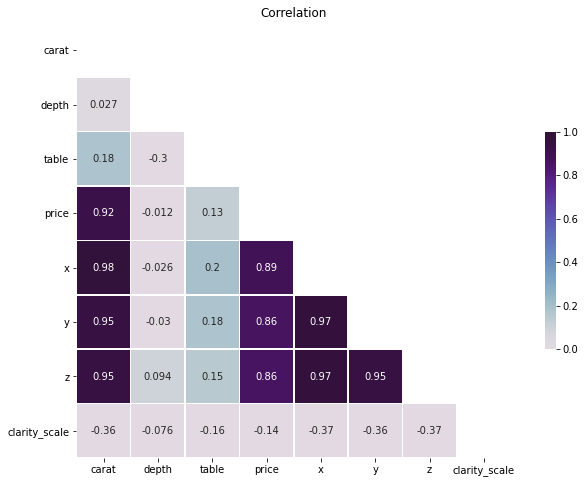

In [10]:
fig = plt.figure(figsize=(12,8))

corr = diamonds.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, cmap='twilight_shifted_r', vmin=.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);
plt.yticks(rotation=360)
plt.title('Correlation');

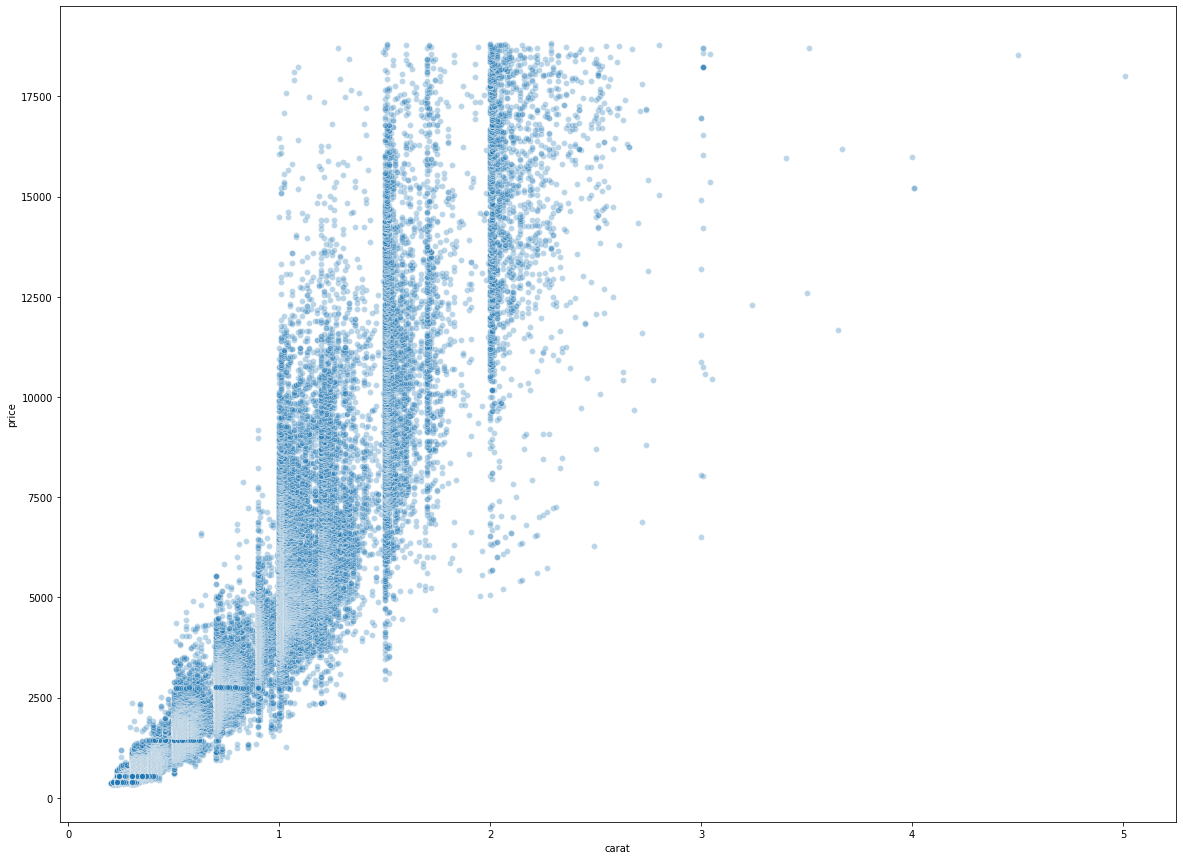

In [11]:
plt.figure(figsize=(20,15))
sns.scatterplot(diamonds.carat, diamonds.price, alpha=0.3)

In [12]:
carat1 = diamonds.query('carat < 1')
carat2 = diamonds.query('carat > 1 and carat < 1.5')

In [13]:
carat1.describe()

,carat,depth,table,price,x,y,z,clarity_scale
count,31667.000000,31667.000000,31667.000000,31667.000000,31667.000000,31667.000000,31667.000000,31667.000000
mean,0.510227,61.736975,57.201898,1633.389933,5.047175,5.055648,3.118979,6.368522
std,0.198350,1.336000,2.214132,1115.589282,0.642367,0.657697,0.431774,1.686634
min,0.200000,51.000000,44.000000,326.000000,0.000000,0.000000,0.000000,1.000000
25%,0.330000,61.100000,56.000000,762.000000,4.450000,4.450000,2.740000,5.000000
50%,0.460000,61.800000,57.000000,1190.000000,4.970000,4.970000,3.060000,6.000000
75%,0.700000,62.500000,58.000000,2310.000000,5.660000,5.670000,3.500000,8.000000
max,0.990000,79.000000,79.000000,9182.000000,6.730000,31.800000,31.800000,10.000000


In [14]:
carat2.describe()

,carat,depth,table,price,x,y,z,clarity_scale
count,10211.000000,10211.000000,10211.000000,10211.000000,10211.000000,10211.000000,10211.000000,10211.000000
mean,1.123684,61.734943,57.679973,6275.101263,6.659789,6.655123,4.107241,5.539124
std,0.110520,1.446530,2.050640,2206.596058,0.262279,0.253540,0.180532,1.612971
min,1.010000,43.000000,43.000000,1262.000000,0.000000,0.000000,0.000000,1.000000
25%,1.020000,61.000000,56.000000,4711.500000,6.470000,6.470000,4.000000,4.000000
50%,1.090000,61.900000,58.000000,5712.000000,6.630000,6.620000,4.080000,5.000000
75%,1.210000,62.550000,59.000000,7264.500000,6.830000,6.830000,4.220000,7.000000
max,1.490000,78.200000,69.000000,18700.000000,7.730000,7.550000,4.640000,10.000000


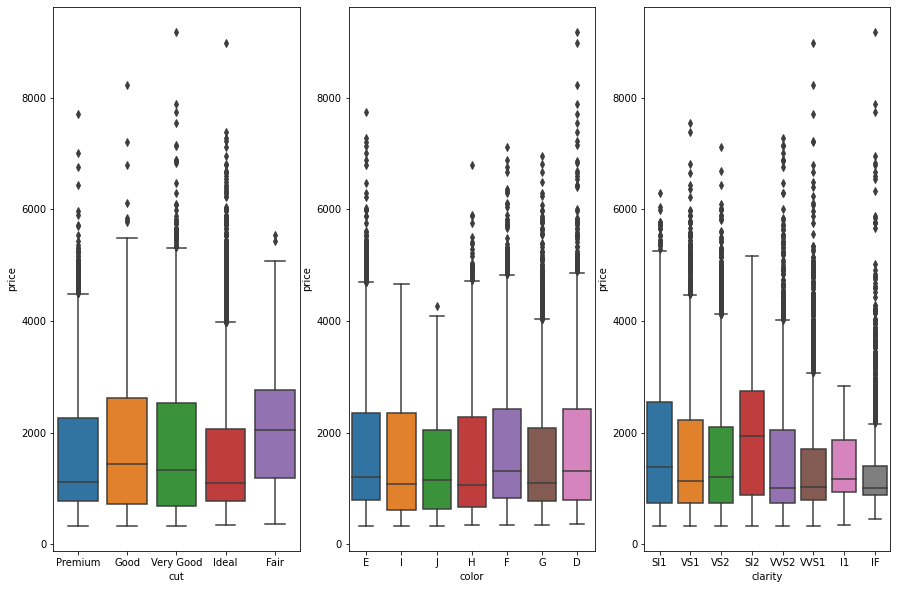

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(15,10))
sns.boxplot(x='cut', y='price', data=carat1, ax = ax[0])
sns.boxplot(x='color', y='price', data=carat1, ax = ax[1])
sns.boxplot(x='clarity', y='price', data=carat1);

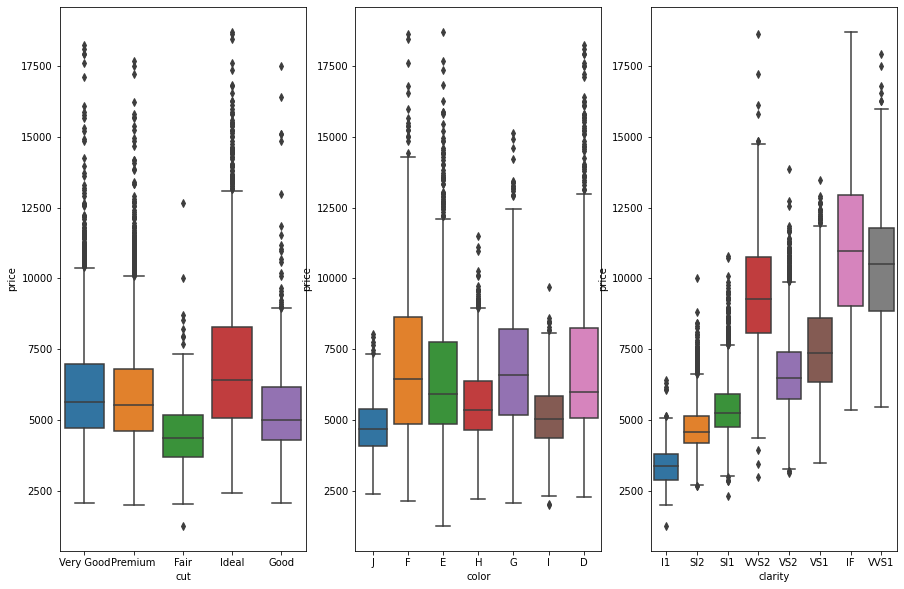

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(15,10))
sns.boxplot(x='cut', y='price', data=carat2, ax = ax[0])
sns.boxplot(x='color', y='price', data=carat2, ax = ax[1])
sns.boxplot(x='clarity', y='price', data=carat2);

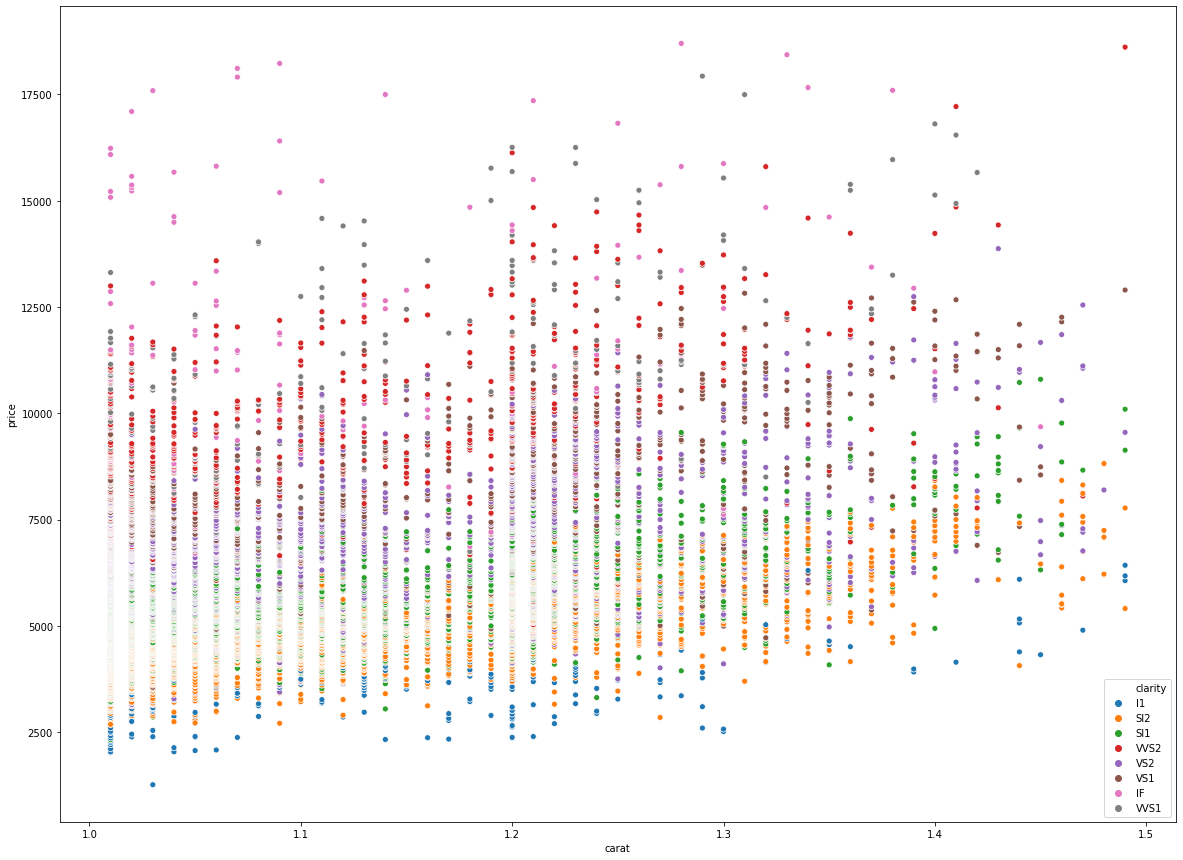

In [17]:
plt.figure(figsize=(20,15))
sns.scatterplot(carat2.carat, carat2.price, hue='clarity', data=carat2)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
model1 = LinearRegression()
X = carat1[['carat']]
y = carat1['price']

model1.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
model1.coef_

array([5150.59843426])

In [21]:
model1.intercept_

-994.5847133547927

In [22]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    mse=metrics.mean_squared_error(y_true, y_pred) 
    r2=metrics.r2_score(y_true, y_pred)

    print('r2: ', round(r2,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [23]:
y_pred = model1.predict(X)
regression_results(y, y_pred)

r2:  0.8386
MSE:  200818.5241
RMSE:  448.1278


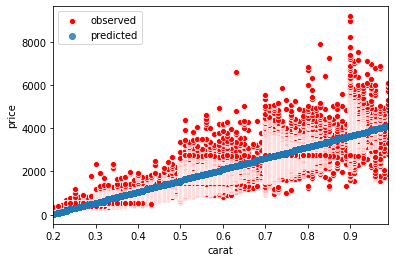

In [24]:
y_pred = model1.predict(X)
sns.scatterplot(carat1.carat, y, color='red', label='observed')
sns.regplot(carat1.carat, y_pred, label='predicted')
plt.legend();

In [25]:
model2 = LinearRegression()
X = carat2[['carat', 'clarity_scale']]
y = carat2['price']

model2.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
model2.coef_

array([6501.60137786, 1011.80950104])

In [27]:
model2.intercept_

-6635.184653053575

In [28]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    mse=metrics.mean_squared_error(y_true, y_pred) 
    r2=metrics.r2_score(y_true, y_pred)

    print('r2: ', round(r2,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [29]:
y_pred = model2.predict(X)
regression_results(y, y_pred)

r2:  0.6723
MSE:  1595201.4158
RMSE:  1263.0128


In [30]:
rick_diamonds = pd.read_csv('../Data/rick_diamonds.csv')

In [31]:
rick_diamonds.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18


In [32]:
clarity_scale = {
                'IF' : 10, 'VVS1' : 9, 
                'VVS2' : 8, 'VS1' : 7, 
                'VS2' : 6, 'SI1' : 5, 
                'SI2' : 4, 'I1' : 3, 
                'I2' : 2, 'I1' : 1
                }

In [33]:
rick_diamonds['clarity_scale'] = rick_diamonds['clarity'].map(clarity_scale)

In [34]:
rick1 = rick_diamonds.query('carat < 1').reset_index().drop(['index'], axis=1)
rick2 = rick_diamonds.query('carat >= 1').reset_index().drop(['index'], axis=1)

In [35]:
X1 = rick1[['carat']]
y_pred1 = model1.predict(X1)

In [36]:
price1 = pd.DataFrame(y_pred1, columns=['price_predicted'])

In [37]:
result1 = pd.concat([rick1, price1], axis=1)

In [38]:
X2 = rick2[['carat', 'clarity_scale']]
y_pred2 = model2.predict(X2)

In [39]:
price2 = pd.DataFrame(y_pred2, columns=['price_predicted'])

In [40]:
result2 = pd.concat([rick2, price2], axis=1)

In [41]:
price_pred = pd.concat([result1, result2], axis=0)

In [42]:
price_pred.describe()

,carat,depth,table,x,y,z,clarity_scale,price_predicted
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.799144,61.724680,57.516140,5.735516,5.736410,3.539576,5.974400,3678.886238
std,0.472936,1.457691,2.244019,1.120300,1.110345,0.694733,1.740101,3285.075900
min,0.200000,44.000000,50.000000,0.000000,0.000000,0.000000,1.000000,35.534973
25%,0.400000,61.000000,56.000000,4.720000,4.720000,2.910000,5.000000,1065.654660
50%,0.710000,61.800000,57.000000,5.710000,5.720000,3.530000,6.000000,2610.834191
75%,1.040000,62.500000,59.000000,6.530000,6.520000,4.032500,7.000000,5474.039060
max,4.130000,73.600000,70.000000,10.000000,9.850000,6.430000,10.000000,21228.238539


In [43]:
#price_pred.to_csv('../Analysis/rick_diamonds.csv')